In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/student_scores.csv')

In [ ]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Performing EDA

In [ ]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [ ]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [ ]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


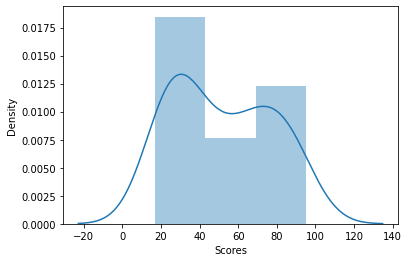

In [ ]:
sns.distplot(data['Scores'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


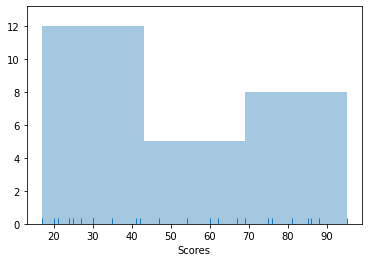

In [ ]:
sns.distplot(data['Scores'], kde=False, rug=True)
plt.show()

Plotting the Distribution

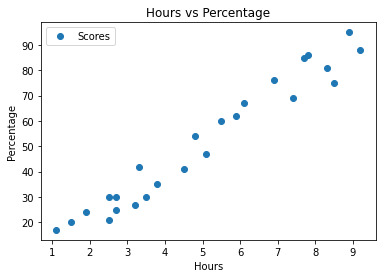

In [ ]:
data.plot(x = 'Hours', y = 'Scores', style = 'o')
plt.title("Hours vs Percentage")
plt.xlabel("Hours")
plt.ylabel('Percentage')
plt.legend()
plt.show()

In [ ]:
#seperating X and Y values

X = data.iloc[:,:-1]
y = data.iloc[: , 1]

In [ ]:
print(X)

    Hours
0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [ ]:
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(regressor.intercept_)

2.018160041434662


In [ ]:
print(regressor.coef_)

[9.91065648]


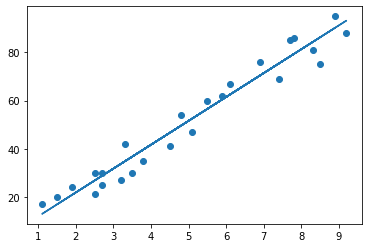

In [ ]:
#Plotting
line = regressor.coef_*X+regressor.intercept_

plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [ ]:
print(X_test)

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [ ]:
#Comparing Values

df = pd.DataFrame({'Actual' : y_test , 'Predicted' : y_pred})

In [ ]:
df.head()

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [ ]:
from sklearn import metrics

In [ ]:
print("Mean Absolute Error : " , metrics.median_absolute_error(y_test, y_pred))

Mean Absolute Error :  3.2051987569597387
